In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [2]:
df=pd.read_csv(r"M:\innomatics data science\gen ai intership\task\da task\ev eda\dataset (1).csv")

In [3]:
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112629,7SAYGDEF2N,King,Duvall,WA,98019,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,45.0,217955265,POINT (-121.98609 47.74068),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032401
112630,1N4BZ1CP7K,San Juan,Friday Harbor,WA,98250,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150,0,40.0,103663227,POINT (-123.01648 48.53448),BONNEVILLE POWER ADMINISTRATION||ORCAS POWER &...,53055960301
112631,1FMCU0KZ4N,King,Vashon,WA,98070,2022,FORD,ESCAPE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,34.0,193878387,POINT (-122.4573 47.44929),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033027702
112632,KNDCD3LD4J,King,Covington,WA,98042,2018,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,47.0,125039043,POINT (-122.09124 47.33778),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032007


# changing the column name for flexibility

In [4]:
df.rename(columns={
    'VIN (1-10)': "vin",
    'County': "county",
    'City': "city",
    'State': "state",
    'Postal Code': "postal_code",
    'Model Year': "model_year",
    'Make': "make",
    'Model': "model",
    'Electric Vehicle Type': "type",
    'Clean Alternative Fuel Vehicle (CAFV) Eligibility': "cafv",
    'Electric Range': "range",
    'Base MSRP': "base_msrp",
    'Legislative District': "legislative_district",
    'DOL Vehicle ID': "dol_vehicl_id",
    'Vehicle Location': "vehicle_location",
    'Electric Utility': "electric_utility",
    '2020 Census Tract': "2020_census_tract"
}, inplace=True)


In [5]:
df.shape

(112634, 17)

In [6]:
df.size

1914778

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   vin                   112634 non-null  object 
 1   county                112634 non-null  object 
 2   city                  112634 non-null  object 
 3   state                 112634 non-null  object 
 4   postal_code           112634 non-null  int64  
 5   model_year            112634 non-null  int64  
 6   make                  112634 non-null  object 
 7   model                 112614 non-null  object 
 8   type                  112634 non-null  object 
 9   cafv                  112634 non-null  object 
 10  range                 112634 non-null  int64  
 11  base_msrp             112634 non-null  int64  
 12  legislative_district  112348 non-null  float64
 13  dol_vehicl_id         112634 non-null  int64  
 14  vehicle_location      112610 non-null  object 
 15  

In [8]:
df.describe()

,postal_code,model_year,range,base_msrp,legislative_district,dol_vehicl_id,2020_census_tract
count,112634.000000,112634.000000,112634.000000,112634.000000,112348.000000,1.126340e+05,1.126340e+05
mean,98156.226850,2019.003365,87.812987,1793.439681,29.805604,1.994567e+08,5.296650e+10
std,2648.733064,2.892364,102.334216,10783.753486,14.700545,9.398427e+07,1.699104e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.777000e+03,1.101001e+09
25%,98052.000000,2017.000000,0.000000,0.000000,18.000000,1.484142e+08,5.303301e+10
50%,98119.000000,2020.000000,32.000000,0.000000,34.000000,1.923896e+08,5.303303e+10
75%,98370.000000,2022.000000,208.000000,0.000000,43.000000,2.191899e+08,5.305307e+10
max,99701.000000,2023.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


# checking for the null values

In [9]:
df.isna().sum()

vin                       0
county                    0
city                      0
state                     0
postal_code               0
model_year                0
make                      0
model                    20
type                      0
cafv                      0
range                     0
base_msrp                 0
legislative_district    286
dol_vehicl_id             0
vehicle_location         24
electric_utility        443
2020_census_tract         0
dtype: int64

# checking for the duplicates

In [10]:
df.duplicated().sum()

0

# filling the null values

In [11]:
df["model"].bfill(inplace=True)
print(df["model"].isnull().sum())

0


In [12]:
df["legislative_district"].bfill(inplace=True)
print(df["legislative_district"].isnull().sum())

0


In [13]:
df["electric_utility"].bfill(inplace=True)
print(df["electric_utility"].isnull().sum())

0


In [14]:

df["vehicle_location"].bfill(inplace=True)
print(df["vehicle_location"].isnull().sum())

0


In [15]:
df.isnull().sum()

vin                     0
county                  0
city                    0
state                   0
postal_code             0
model_year              0
make                    0
model                   0
type                    0
cafv                    0
range                   0
base_msrp               0
legislative_district    0
dol_vehicl_id           0
vehicle_location        0
electric_utility        0
2020_census_tract       0
dtype: int64

In [16]:
dff=df

# univariate analysis

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def num_col_uni(df, column_name):
  

  # Check if column exists
  if column_name not in df.columns:
    print(f"Error: Column '{column_name}' does not exist in the DataFrame.")
    return

  # Description of the column
    
  print(f"Description of '{column_name}' column:")
  print(df[column_name].describe())

  print("\n*************************************************************")

  # Number of unique values
  print(f"\nNUnique values of '{column_name}' column:")
  print(df[column_name].nunique())

  print("\n*************************************************************")

  # Unique values
  print(f"\nUnique values of '{column_name}' column:")
  print(df[column_name].unique())

  print("\n*************************************************************")

  # Minimum and maximum values
  print(f"\nMinimum value of '{column_name}' column:", df[column_name].min())
  print(f"Maximum value of '{column_name}' column:", df[column_name].max())

  print("\n*************************************************************")

  # Distribution (if numeric)
  if pd.api.types.is_numeric_dtype(df[column_name]):
    print(f"\nDistribution of '{column_name}' column:")
    sns.distplot(df[column_name])
    plt.show()

  else:
    print(f"\n'{column_name}' column is not numeric. Distribution plot cannot be generated.")

  print("\n*************************************************************")

  # Skewness
  print(f"\nSkewness of '{column_name}' column:", df[column_name].skew())



In [18]:

def cat_col_uni(df, column_name):
  

  # Check if column exists
  if column_name not in df.columns:
    print(f"Error: Column '{column_name}' does not exist in the DataFrame.")
    return

  # Description of the column
  print(f"Description of '{column_name}' column:")
  print(df[column_name].describe())

  print("\n*************************************************************")

  # Number of unique values
  print(f"\nNUnique values of '{column_name}' column:")
  print(df[column_name].nunique())

  print("\n*************************************************************")

  # Unique values
  print(f"\nUnique values of '{column_name}' column:")
  print(df[column_name].unique())

  print("\n*************************************************************")

  # Value counts
  print(f"\nValue counts of '{column_name}' column:")
  print(df[column_name].value_counts())

  print("\n*************************************************************")

  if df[column_name].nunique() <=20:
      

    
      print(f"\nCountplot of '{column_name}' column:")
      sns.countplot(x=df[column_name])
      plt.show()

      print("\n*************************************************************")

  # Mode
  print(f"\nMode of '{column_name}' column:")
  print(df[column_name].mode().tolist())

  print("\n*************************************************************")

 

  # Most frequent value and its percentage
  most_frequent_value = df[column_name].value_counts().idxmax()
  most_frequent_percentage = (df[column_name] == most_frequent_value).mean() * 100
  print(f"\nMost frequent value: {most_frequent_value} ({most_frequent_percentage:.2f}%)")

  print("\n*************************************************************")

  # Least frequent value and its percentage
  least_frequent_value = df[column_name].value_counts().idxmin()
  least_frequent_percentage = (df[column_name] == least_frequent_value).mean() * 100
  print(f"\nLeast frequent value: {least_frequent_value} ({least_frequent_percentage:.2f}%)")

  print("\n*************************************************************")
    

In [19]:
# cat columns

In [20]:
cat_col = df.select_dtypes(include='object').columns


In [21]:
cat_col

Index(['vin', 'county', 'city', 'state', 'make', 'model', 'type', 'cafv',
       'vehicle_location', 'electric_utility'],
      dtype='object')

In [22]:
cat_col_uni(df,"vin")

Description of 'vin' column:
count         112634
unique          7548
top       5YJYGDEE9M
freq             472
Name: vin, dtype: object

*************************************************************

NUnique values of 'vin' column:
7548

*************************************************************

Unique values of 'vin' column:
['JTMEB3FV6N' '1G1RD6E45D' 'JN1AZ0CP8B' ... 'KMHE14L25K' 'WA1LAAGE5M'
 'YV4ED3GM0P']

*************************************************************

Value counts of 'vin' column:
vin
5YJYGDEE9M    472
5YJYGDEE0M    465
5YJYGDEE8M    448
5YJYGDEE7M    448
5YJYGDEE2M    437
             ... 
WA1LAAGE9M      1
5UXKT0C50H      1
5YJYGAED3M      1
WDC0G5DBXL      1
YV4ED3GM0P      1
Name: count, Length: 7548, dtype: int64

*************************************************************

Mode of 'vin' column:
['5YJYGDEE9M']

*************************************************************

Most frequent value: 5YJYGDEE9M (0.42%)

***************************************

In [23]:
cat_col_uni(df,'county')

Description of 'county' column:
count     112634
unique       165
top         King
freq       59000
Name: county, dtype: object

*************************************************************

NUnique values of 'county' column:
165

*************************************************************

Unique values of 'county' column:
['Monroe' 'Clark' 'Yakima' 'Skagit' 'Snohomish' 'Island' 'Thurston'
 'Grant' 'St. Clair' 'Pierce' 'Saratoga' 'Stevens' 'King' 'Kitsap'
 'Newport News' 'Jackson' 'Whitman' 'Lake' 'Spokane' 'Clallam' 'Cowlitz'
 'Kittitas' 'Grays Harbor' 'Chelan' 'Whatcom' 'Benton' 'Walla Walla'
 'Mason' 'San Juan' 'Lewis' 'Jefferson' 'Douglas' 'Klickitat' 'Geary'
 'Skamania' 'Fairfax' 'Adams' 'Franklin' 'Okanogan' 'Sonoma' 'Asotin'
 'Ferry' 'Pacific' 'Riverside' 'Orange' 'Columbia' 'Wahkiakum'
 'Leavenworth' 'Contra Costa' 'Howard' 'Larimer' 'District of Columbia'
 'Washington' 'Tipton' 'San Diego' 'Sumter' "Prince George's" 'New Haven'
 'Lincoln' 'Las Animas' 'Frederick' 'Hidalgo'

In [24]:
cat_col_uni(df,'city')

Description of 'city' column:
count      112634
unique        629
top       Seattle
freq        20305
Name: city, dtype: object

*************************************************************

NUnique values of 'city' column:
629

*************************************************************

Unique values of 'city' column:
['Key West' 'Laughlin' 'Yakima' 'Concrete' 'Everett' 'Bothell' 'Mukilteo'
 'Clinton' 'Anacortes' 'Lacey' 'Moses Lake' 'Mascoutah' 'Rochester'
 'Burlington' 'Kapowsin' 'Marysville' 'Lynnwood' 'Greenfield Center'
 'Edmonds' 'Nine Mile Falls' 'Olympia' 'Seattle' 'Auburn' 'Langley'
 'Snohomish' 'Bremerton' 'Newport News' 'Altus' 'Pullman' 'Highland Park'
 'Spokane' 'Suquamish' 'Monroe' 'Sequim' 'Keyport' 'Gurnee' 'Maple Valley'
 'Kent' 'Lake Forest Park' 'Poulsbo' 'Redmond' 'Issaquah' 'Longview'
 'Tacoma' 'Ellensburg' 'Burien' 'Gig Harbor' 'South Hill' 'Sammamish'
 'Westport' 'Vancouver' 'Airway Heights' 'Mercer Island' 'Stanwood'
 'Tumwater' 'Bainbridge Island' 'Entiat'

In [25]:
cat_col_uni(df,'state')

Description of 'state' column:
count     112634
unique        45
top           WA
freq      112348
Name: state, dtype: object

*************************************************************

NUnique values of 'state' column:
45

*************************************************************

Unique values of 'state' column:
['FL' 'NV' 'WA' 'IL' 'NY' 'VA' 'OK' 'KS' 'CA' 'NE' 'MD' 'CO' 'DC' 'TN'
 'SC' 'CT' 'OR' 'TX' 'SD' 'HI' 'GA' 'MS' 'AR' 'NC' 'MO' 'UT' 'PA' 'DE'
 'OH' 'WY' 'AL' 'ID' 'AZ' 'AK' 'LA' 'NM' 'WI' 'KY' 'NJ' 'MN' 'MA' 'ME'
 'RI' 'NH' 'ND']

*************************************************************

Value counts of 'state' column:
state
WA    112348
CA        76
VA        36
MD        26
TX        14
CO         9
NV         8
GA         7
NC         7
CT         6
DC         6
FL         6
AZ         6
IL         6
SC         5
OR         5
NE         5
HI         4
UT         4
AR         4
NY         4
TN         3
KS         3
MO         3
PA         3
MA         3
LA    

In [26]:
cat_col_uni(df,'make')

Description of 'make' column:
count     112634
unique        34
top        TESLA
freq       52078
Name: make, dtype: object

*************************************************************

NUnique values of 'make' column:
34

*************************************************************

Unique values of 'make' column:
['TOYOTA' 'CHEVROLET' 'NISSAN' 'FORD' 'TESLA' 'KIA' 'AUDI' 'FIAT' 'BMW'
 'PORSCHE' 'CADILLAC' 'HONDA' 'MITSUBISHI' 'CHRYSLER' 'RIVIAN' 'HYUNDAI'
 'VOLVO' 'VOLKSWAGEN' 'MERCEDES-BENZ' 'JEEP' 'MINI' 'SMART' 'SUBARU'
 'POLESTAR' 'LUCID MOTORS' 'LINCOLN' 'JAGUAR' 'FISKER' 'LAND ROVER'
 'LEXUS' 'TH!NK' 'GENESIS' 'BENTLEY' 'AZURE DYNAMICS']

*************************************************************

Value counts of 'make' column:
make
TESLA             52078
NISSAN            12880
CHEVROLET         10182
FORD               5819
BMW                4680
KIA                4483
TOYOTA             4405
VOLKSWAGEN         2514
AUDI               2332
VOLVO              2288
CHR

In [27]:
cat_col_uni(df,'model')

Description of 'model' column:
count      112634
unique        114
top       MODEL 3
freq        23136
Name: model, dtype: object

*************************************************************

NUnique values of 'model' column:
114

*************************************************************

Unique values of 'model' column:
['RAV4 PRIME' 'VOLT' 'LEAF' 'BOLT EV' 'FUSION' 'MODEL 3' 'SOUL' 'Q5 E'
 'MODEL X' '500' 'X5' '530E' 'TAYCAN' 'X3' 'A3' 'SOUL EV' 'C-MAX'
 'MODEL S' 'F-150' 'CT6' 'I3' 'CLARITY' 'MODEL Y' 'NIRO' 'OUTLANDER'
 'PACIFICA' 'R1T' 'KONA ELECTRIC' 'XC40' 'ID.4' 'PRIUS PLUG-IN'
 'MUSTANG MACH-E' 'EQB-CLASS' 'E-GOLF' 'PRIUS PRIME' 'C40' 'SORENTO'
 'XC60' 'CAYENNE' 'WRANGLER' 'COUNTRYMAN' 'S60' 'EV6'
 'FORTWO ELECTRIC DRIVE' 'GRAND CHEROKEE' '330E' 'CROSSTREK' 'IONIQ 5'
 'IONIQ' 'E-TRON' 'ROADSTER' 'KONA' 'XC90' 'SPARK' 'PS2' 'A7' 'HARDTOP'
 'ESCAPE' 'LUCID AIR' 'E-TRON SPORTBACK' 'Q5' 'RAV4' 'AVIATOR' 'E-TRON GT'
 'EDV' 'IX' 'FORTWO' 'I-PACE' 'SANTA FE' 'B-CLASS' 'KARMA' '

Description of 'type' column:
count                             112634
unique                                 2
top       Battery Electric Vehicle (BEV)
freq                               86044
Name: type, dtype: object

*************************************************************

NUnique values of 'type' column:
2

*************************************************************

Unique values of 'type' column:
['Plug-in Hybrid Electric Vehicle (PHEV)' 'Battery Electric Vehicle (BEV)']

*************************************************************

Value counts of 'type' column:
type
Battery Electric Vehicle (BEV)            86044
Plug-in Hybrid Electric Vehicle (PHEV)    26590
Name: count, dtype: int64

*************************************************************

Countplot of 'type' column:


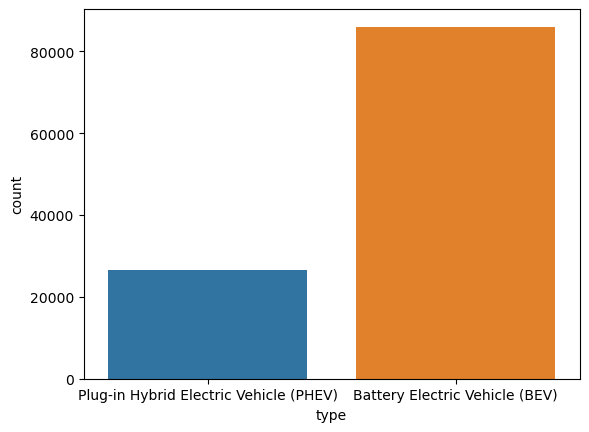


*************************************************************

Mode of 'type' column:
['Battery Electric Vehicle (BEV)']

*************************************************************

Most frequent value: Battery Electric Vehicle (BEV) (76.39%)

*************************************************************

Least frequent value: Plug-in Hybrid Electric Vehicle (PHEV) (23.61%)

*************************************************************


In [28]:
cat_col_uni(df,'type')

Description of 'cafv' column:
count                                      112634
unique                                          3
top       Clean Alternative Fuel Vehicle Eligible
freq                                        58639
Name: cafv, dtype: object

*************************************************************

NUnique values of 'cafv' column:
3

*************************************************************

Unique values of 'cafv' column:
['Clean Alternative Fuel Vehicle Eligible'
 'Not eligible due to low battery range'
 'Eligibility unknown as battery range has not been researched']

*************************************************************

Value counts of 'cafv' column:
cafv
Clean Alternative Fuel Vehicle Eligible                         58639
Eligibility unknown as battery range has not been researched    39236
Not eligible due to low battery range                           14759
Name: count, dtype: int64

*************************************************************



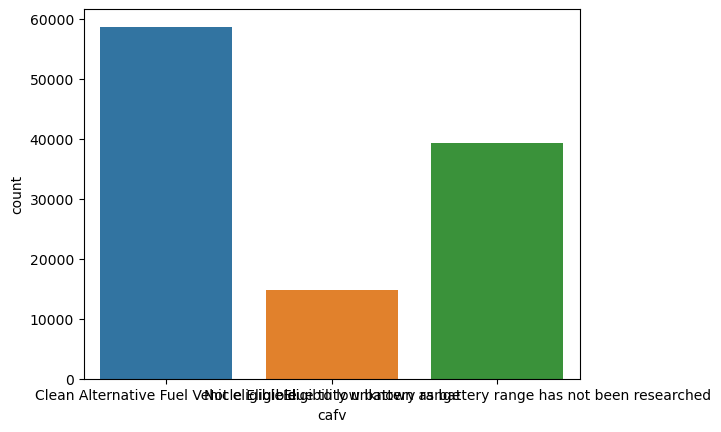


*************************************************************

Mode of 'cafv' column:
['Clean Alternative Fuel Vehicle Eligible']

*************************************************************

Most frequent value: Clean Alternative Fuel Vehicle Eligible (52.06%)

*************************************************************

Least frequent value: Not eligible due to low battery range (13.10%)

*************************************************************


In [29]:
cat_col_uni(df,'cafv')

In [30]:
cat_col_uni(df,"vehicle_location")

Description of 'vehicle_location' column:
count                          112634
unique                            758
top       POINT (-122.13158 47.67858)
freq                             2916
Name: vehicle_location, dtype: object

*************************************************************

NUnique values of 'vehicle_location' column:
758

*************************************************************

Unique values of 'vehicle_location' column:
['POINT (-81.80023 24.5545)' 'POINT (-114.57245 35.16815)'
 'POINT (-120.50721 46.60448)' 'POINT (-121.7515 48.53892)'
 'POINT (-122.20596 47.97659)' 'POINT (-122.18384 47.8031)'
 'POINT (-122.23019 47.94949)' 'POINT (-122.29196 47.89908)'
 'POINT (-122.35803 47.9796)' 'POINT (-122.61214 48.51748)'
 'POINT (-122.75379 47.06316)' 'POINT (-119.2771 47.13196)'
 'POINT (-89.79939 38.49028)' 'POINT (-123.08743 46.82175)'
 'POINT (-122.33029 48.46846)' 'POINT (-122.19388 48.15353)'
 'POINT (-122.27734 47.83785)' 'POINT (-73.84643 43.1284)'
 'POINT

In [31]:
cat_col_uni(df,'electric_utility')

Description of 'electric_utility' column:
count                                            112634
unique                                               73
top       PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
freq                                              40392
Name: electric_utility, dtype: object

*************************************************************

NUnique values of 'electric_utility' column:
73

*************************************************************

Unique values of 'electric_utility' column:
['PACIFICORP' 'PUGET SOUND ENERGY INC' 'PUD NO 2 OF GRANT COUNTY'
 'PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)'
 'CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)' 'AVISTA CORP'
 'MODERN ELECTRIC WATER COMPANY'
 'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF COWLITZ COUNTY'
 'BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY'
 'BONNEVILLE POWER ADMINISTRATION||CITY OF ELLENSBURG - (WA)'
 'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF GRAYS HARBO

In [32]:
# numeric col uni variate analysis

In [33]:
num_col = df.select_dtypes(include='number').columns


In [34]:
num_col

Index(['postal_code', 'model_year', 'range', 'base_msrp',
       'legislative_district', 'dol_vehicl_id', '2020_census_tract'],
      dtype='object')

Description of 'postal_code' column:
count    112634.000000
mean      98156.226850
std        2648.733064
min        1730.000000
25%       98052.000000
50%       98119.000000
75%       98370.000000
max       99701.000000
Name: postal_code, dtype: float64

*************************************************************

NUnique values of 'postal_code' column:
773

*************************************************************

Unique values of 'postal_code' column:
[33040 89029 98901 98237 98201 98021 98203 98275 98236 98221 98516 98837
 62258 98579 98233 98344 98271 98037 12833 98026 99026 98502 98087 98125
 98001 98115 98020 98260 98503 98501 98208 98296 98312 98036 98204 23602
 98902 98908 73521 99163 60035 99205 98392 98272 98382 98345 98513 60031
 98038 98270 98031 98155 98370 98290 98052 98029 98632 98406 98926 98168
 98329 98373 98074 98102 98595 98683 98011 99001 98075 98040 98292 98053
 98110 98032 98112 98122 98116 98002 98822 98498 98391 98106 98402 98008
 98663 99212 98033 9814

C:\Users\jeeva\AppData\Local\Temp\ipykernel_21548\1712960893.py:41: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column_name])
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


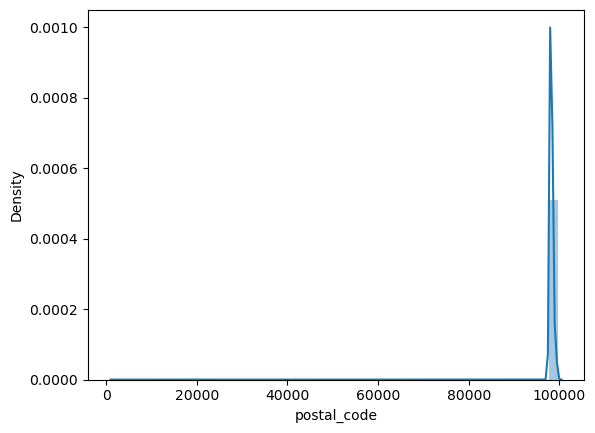


*************************************************************

Skewness of 'postal_code' column: -27.95528547622011


In [35]:
num_col_uni(df,"postal_code")

Description of 'model_year' column:
count    112634.000000
mean       2019.003365
std           2.892364
min        1997.000000
25%        2017.000000
50%        2020.000000
75%        2022.000000
max        2023.000000
Name: model_year, dtype: float64

*************************************************************

NUnique values of 'model_year' column:
20

*************************************************************

Unique values of 'model_year' column:
[2022 2013 2011 2017 2019 2018 2016 2020 2021 2015 2014 2012 2023 2010
 2008 2000 1997 1999 1998 2002]

*************************************************************

Minimum value of 'model_year' column: 1997
Maximum value of 'model_year' column: 2023

*************************************************************

Distribution of 'model_year' column:


C:\Users\jeeva\AppData\Local\Temp\ipykernel_21548\1712960893.py:41: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column_name])
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


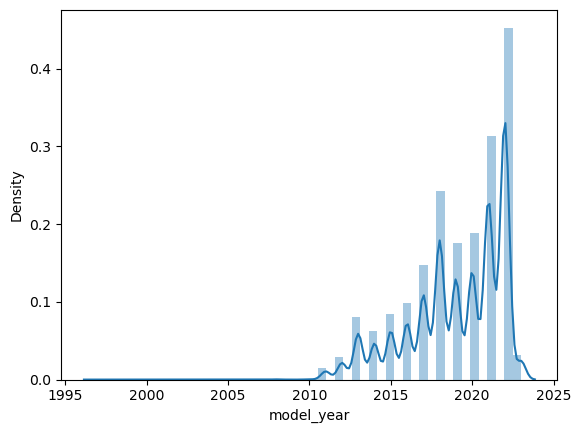


*************************************************************

Skewness of 'model_year' column: -0.817579026188019


In [36]:
num_col_uni(df,'model_year')

Description of 'range' column:
count    112634.000000
mean         87.812987
std         102.334216
min           0.000000
25%           0.000000
50%          32.000000
75%         208.000000
max         337.000000
Name: range, dtype: float64

*************************************************************

NUnique values of 'range' column:
101

*************************************************************

Unique values of 'range' column:
[ 42  38  73 238  26 215  75  84  93  20 293  53 150 107  14 200   0  15
 151 266 192  17  16 220 111  19  87 249 210  31 208  72 259  47 291 239
  22 322  32   6 203  83  25 125  21 149  97 289  18  13  12  68  30 308
 170 204 245 258 126  82  29  24 110 218  41 265 330 222  23 103 270  35
  58  33 234  81 153 114  10  27  76  28  40   8 337  37  62  34 233   9
 124 100  57  56  39  48  74  36  11  59  95]

*************************************************************

Minimum value of 'range' column: 0
Maximum value of 'range' column: 337

**********

C:\Users\jeeva\AppData\Local\Temp\ipykernel_21548\1712960893.py:41: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column_name])
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


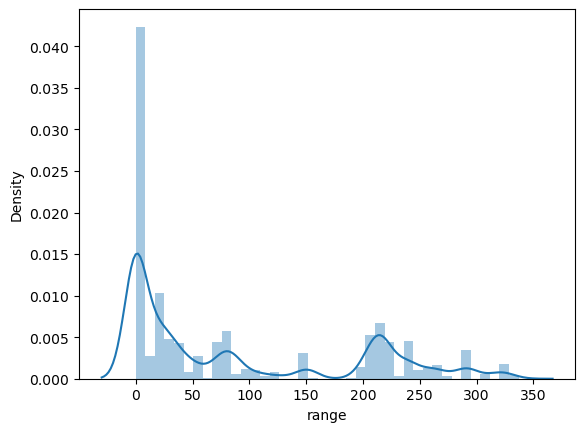


*************************************************************

Skewness of 'range' column: 0.8171032263518314


In [37]:
num_col_uni(df,"range")

Description of 'base_msrp' column:
count    112634.000000
mean       1793.439681
std       10783.753486
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      845000.000000
Name: base_msrp, dtype: float64

*************************************************************

NUnique values of 'base_msrp' column:
30

*************************************************************

Unique values of 'base_msrp' column:
[     0  31950  55700  33950  69900  36900  43700  34995  39995  32250
  44100 110950  59900  52900  54950 102000  45600  53400  64950 184400
  90700  36800  81100  75095  52650  91250 109000  98950  89100 845000]

*************************************************************

Minimum value of 'base_msrp' column: 0
Maximum value of 'base_msrp' column: 845000

*************************************************************

Distribution of 'base_msrp' column:


C:\Users\jeeva\AppData\Local\Temp\ipykernel_21548\1712960893.py:41: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column_name])
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


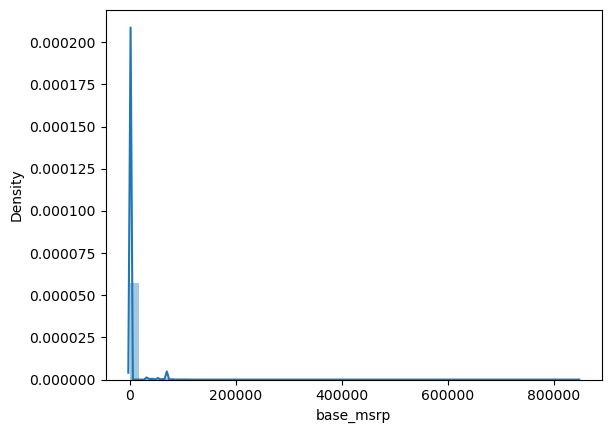


*************************************************************

Skewness of 'base_msrp' column: 10.100497243522174


In [38]:
num_col_uni(df,'base_msrp')

Description of 'legislative_district' column:
count    112634.000000
mean         29.805414
std          14.701944
min           1.000000
25%          18.000000
50%          34.000000
75%          43.000000
max          49.000000
Name: legislative_district, dtype: float64

*************************************************************

NUnique values of 'legislative_district' column:
49

*************************************************************

Unique values of 'legislative_district' column:
[15. 39. 38.  1. 21. 10. 40. 22. 13. 20.  2. 32.  7. 46. 30. 35. 44. 14.
  9.  3. 23. 24.  5. 33. 45. 19. 27. 26. 25. 43. 17.  6. 41. 37. 34. 31.
 12. 28. 48. 49.  4. 29. 36. 42.  8. 18. 11. 16. 47.]

*************************************************************

Minimum value of 'legislative_district' column: 1.0
Maximum value of 'legislative_district' column: 49.0

*************************************************************

Distribution of 'legislative_district' column:


C:\Users\jeeva\AppData\Local\Temp\ipykernel_21548\1712960893.py:41: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column_name])
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


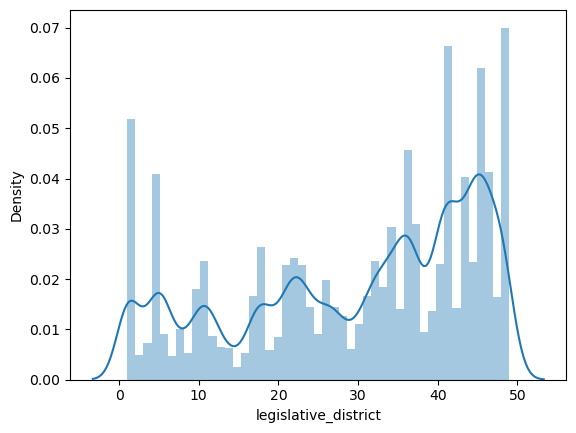


*************************************************************

Skewness of 'legislative_district' column: -0.5422748627744656


In [39]:
num_col_uni(df, 'legislative_district')

Description of 'dol_vehicl_id' column:
count    1.126340e+05
mean     1.994567e+08
std      9.398427e+07
min      4.777000e+03
25%      1.484142e+08
50%      1.923896e+08
75%      2.191899e+08
max      4.792548e+08
Name: dol_vehicl_id, dtype: float64

*************************************************************

NUnique values of 'dol_vehicl_id' column:
112634

*************************************************************

Unique values of 'dol_vehicl_id' column:
[198968248   5204412 218972519 ... 193878387 125039043 194673692]

*************************************************************

Minimum value of 'dol_vehicl_id' column: 4777
Maximum value of 'dol_vehicl_id' column: 479254772

*************************************************************

Distribution of 'dol_vehicl_id' column:


C:\Users\jeeva\AppData\Local\Temp\ipykernel_21548\1712960893.py:41: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column_name])
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


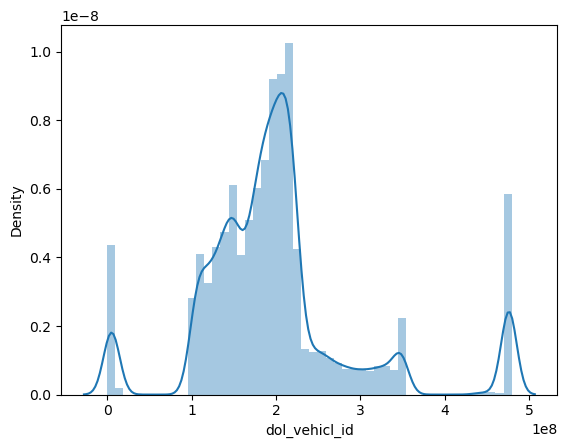


*************************************************************

Skewness of 'dol_vehicl_id' column: 1.149258228667741


In [40]:
num_col_uni(df, 'dol_vehicl_id')

Description of '2020_census_tract' column:
count    1.126340e+05
mean     5.296650e+10
std      1.699104e+09
min      1.101001e+09
25%      5.303301e+10
50%      5.303303e+10
75%      5.305307e+10
max      5.603300e+10
Name: 2020_census_tract, dtype: float64

*************************************************************

NUnique values of '2020_census_tract' column:
2026

*************************************************************

Unique values of '2020_census_tract' column:
[12087972100 32003005702 53077001602 ... 20103071104 38105954100
 16055940000]

*************************************************************

Minimum value of '2020_census_tract' column: 1101001400
Maximum value of '2020_census_tract' column: 56033000100

*************************************************************

Distribution of '2020_census_tract' column:


C:\Users\jeeva\AppData\Local\Temp\ipykernel_21548\1712960893.py:41: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column_name])
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


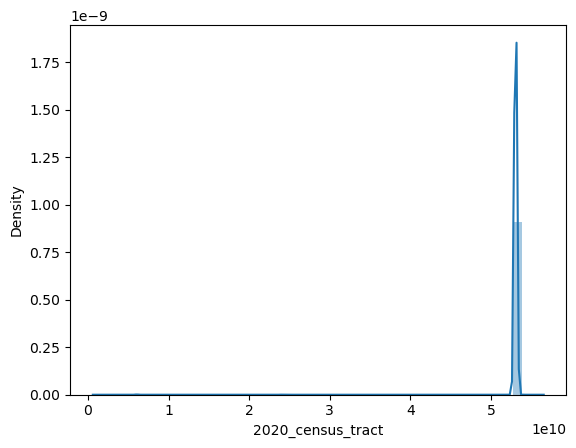


*************************************************************

Skewness of '2020_census_tract' column: -25.01392665007962


In [41]:
num_col_uni(df,'2020_census_tract')

In [42]:
df.head(1)

,vin,county,city,state,postal_code,model_year,make,model,type,cafv,range,base_msrp,legislative_district,dol_vehicl_id,vehicle_location,electric_utility,2020_census_tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,15.0,198968248,POINT (-81.80023 24.5545),PACIFICORP,12087972100


In [43]:
df.columns

Index(['vin', 'county', 'city', 'state', 'postal_code', 'model_year', 'make',
       'model', 'type', 'cafv', 'range', 'base_msrp', 'legislative_district',
       'dol_vehicl_id', 'vehicle_location', 'electric_utility',
       '2020_census_tract'],
      dtype='object')

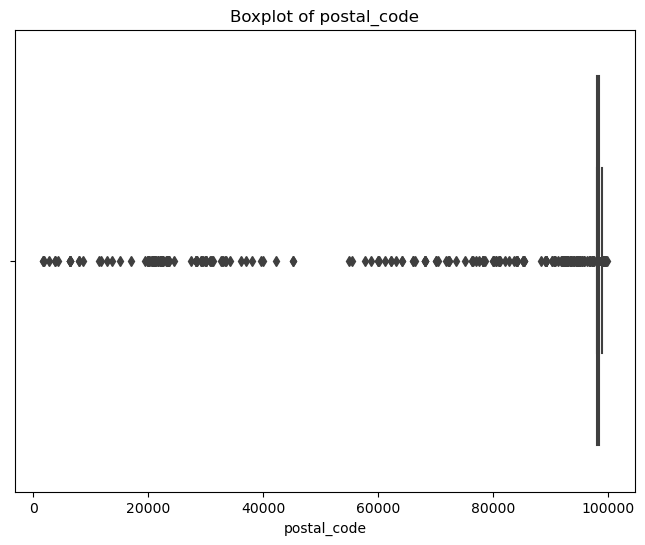

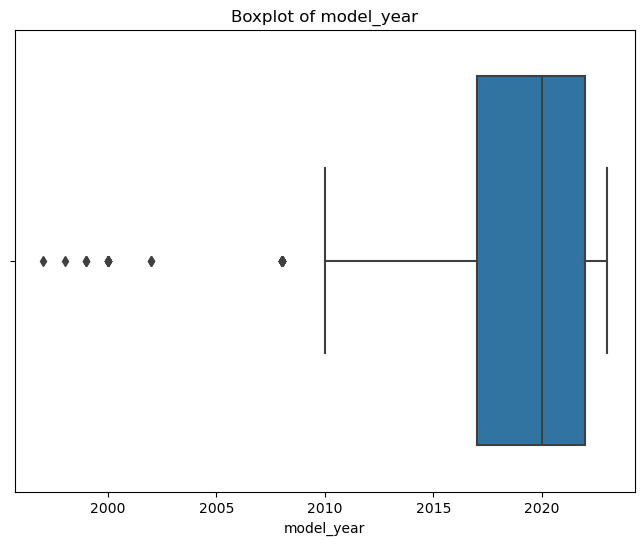

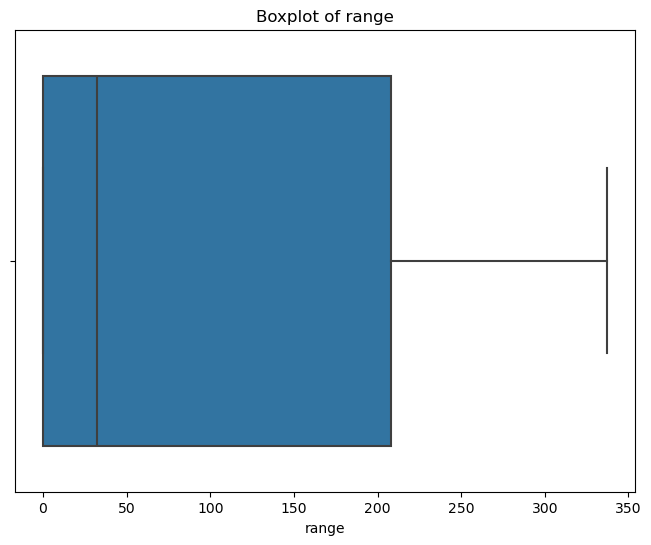

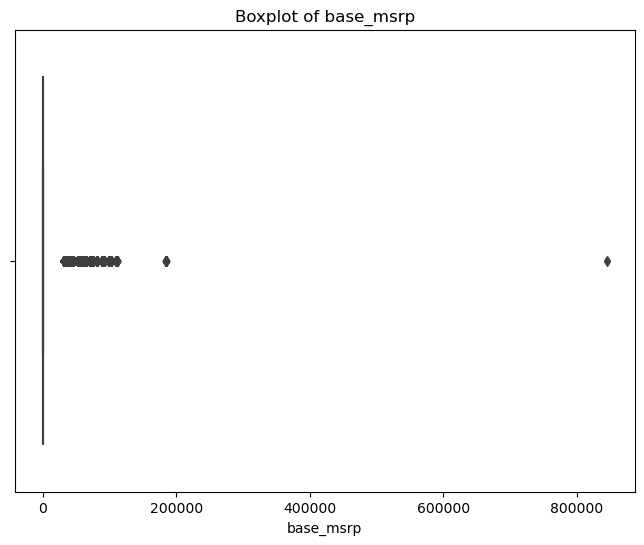

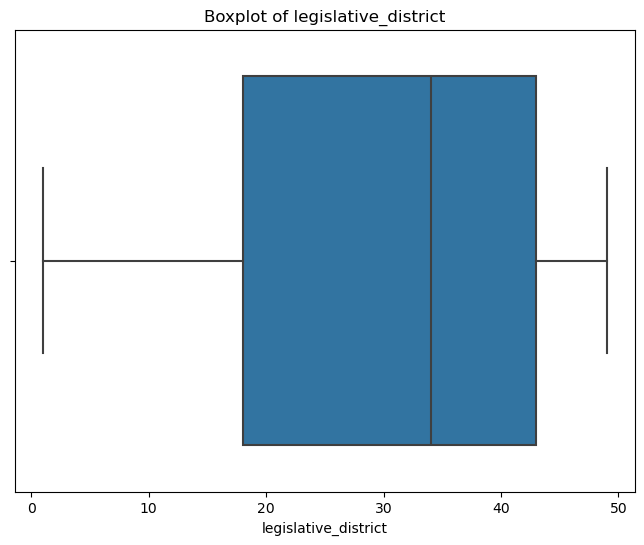

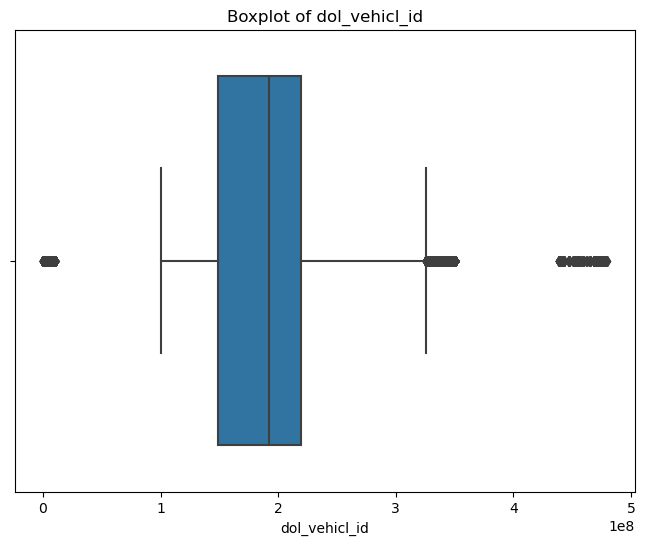

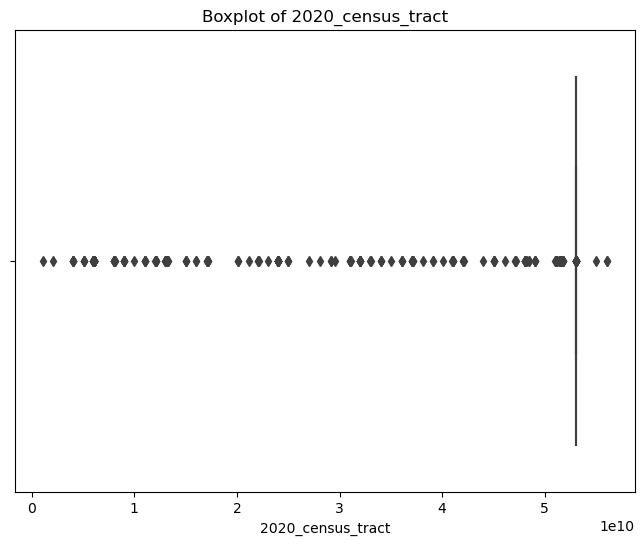

In [44]:
# outliers fuction



num_col = df.select_dtypes(include='number').columns




for i in num_col:
    plt.figure(figsize=(8, 6))  
    sns.boxplot(x=df[i])
    plt.title(f'Boxplot of {i}')
    plt.show()




In [45]:
# fuction for caping the outliers by iqr method

def iqr(column):
    q1 = np.quantile(column, 0.25)
    q3 = np.quantile(column, 0.75)
    rang = q3 - q1
    right = q3 + rang * 1.5
    left = q1 - rang * 1.5
    
    # Caping extreme values
    column[column > right] = right
    column[column < left] = left

    return column



In [46]:
# executing the fuxction 

for i in num_col:
    
    df[i] = iqr(df[i])




C:\Users\jeeva\AppData\Local\Temp\ipykernel_21548\2322933710.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column > right] = right
C:\Users\jeeva\AppData\Local\Temp\ipykernel_21548\2322933710.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column < left] = left
C:\Users\jeeva\AppData\Local\Temp\ipykernel_21548\2322933710.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column > right] = right
C:\Use

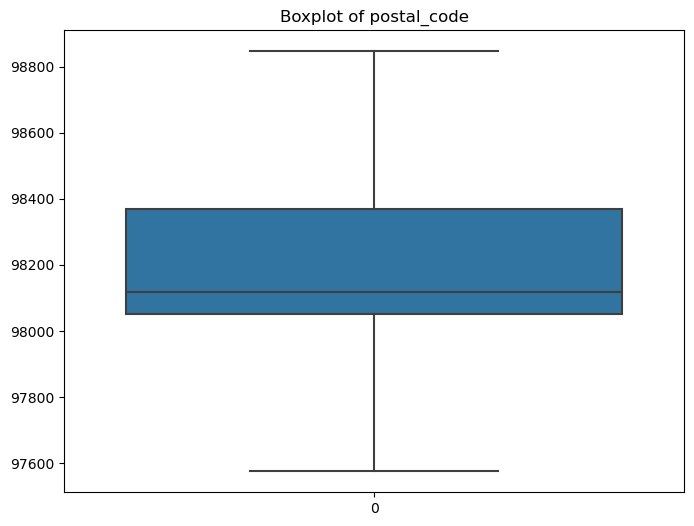

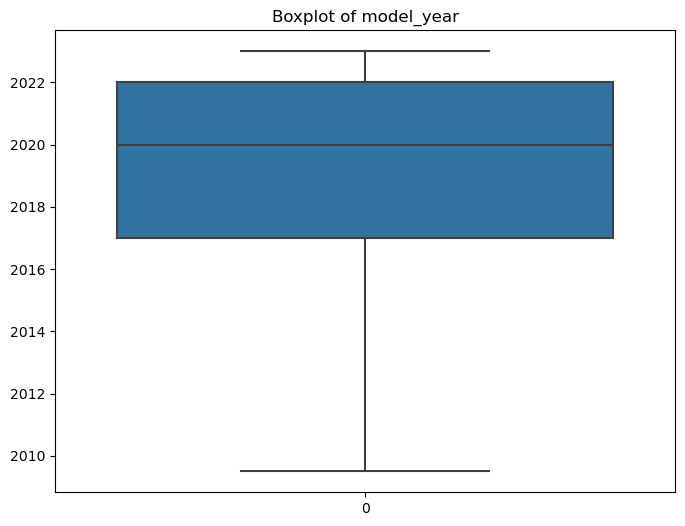

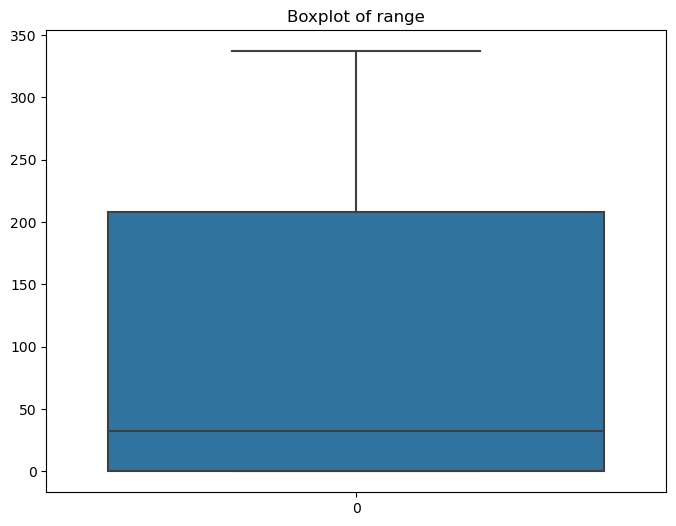

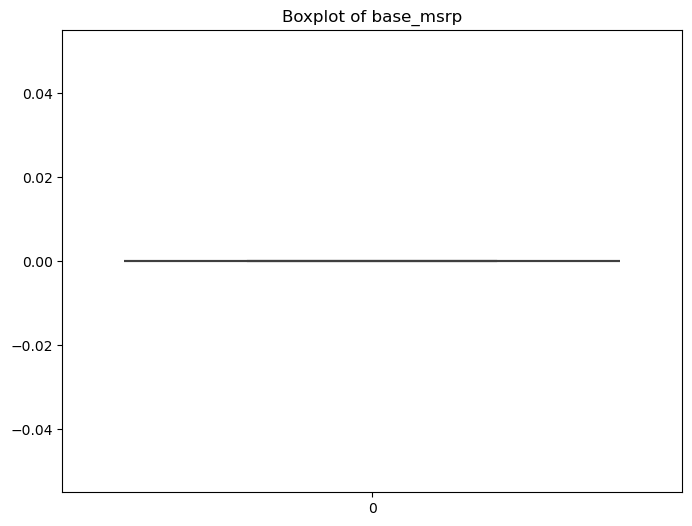

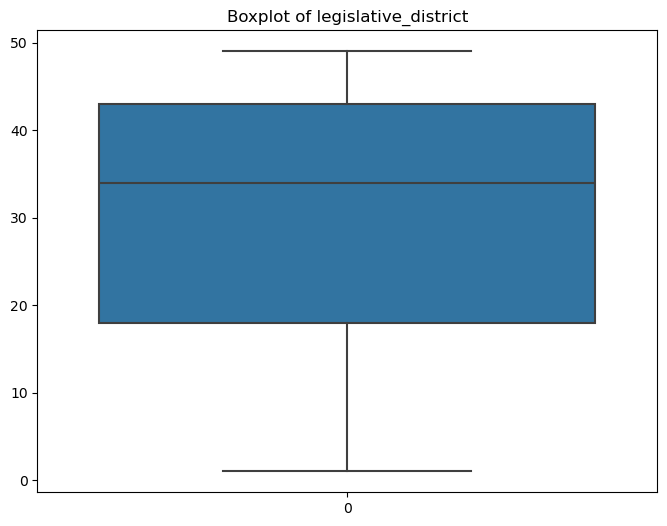

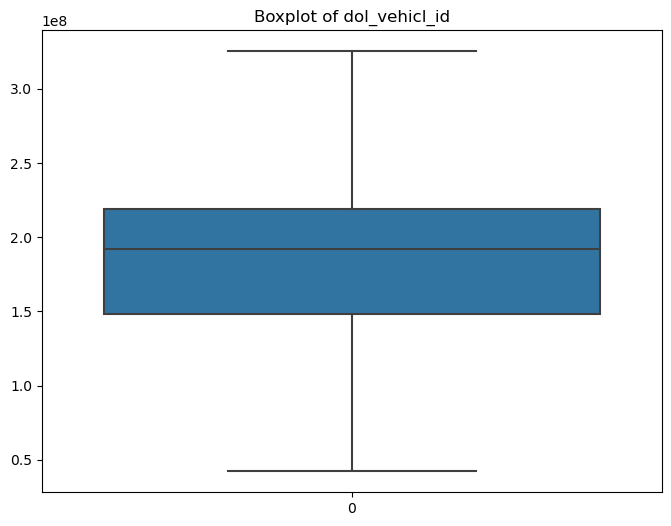

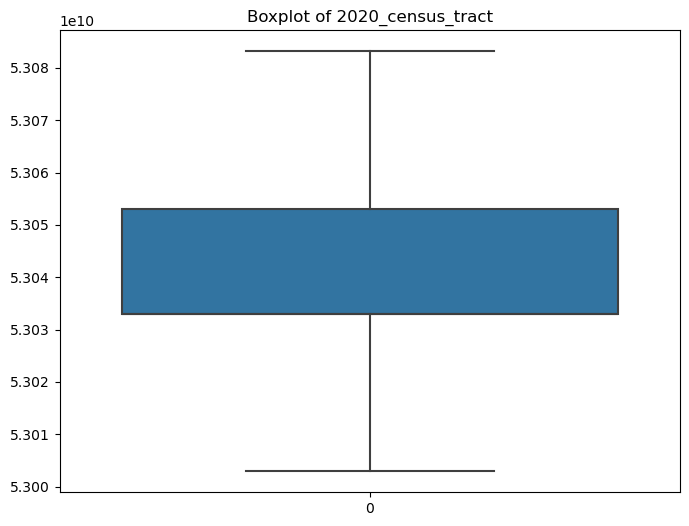

In [47]:
# dataframe after the outliers



for i in num_col:
    plt.figure(figsize=(8, 6))  
    sns.boxplot(df[i])
    plt.title(f'Boxplot of {i}')
    plt.show()



# # bivariate and multi variate  analysis

# Correlation Heatmap (Numeric Columns):

C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


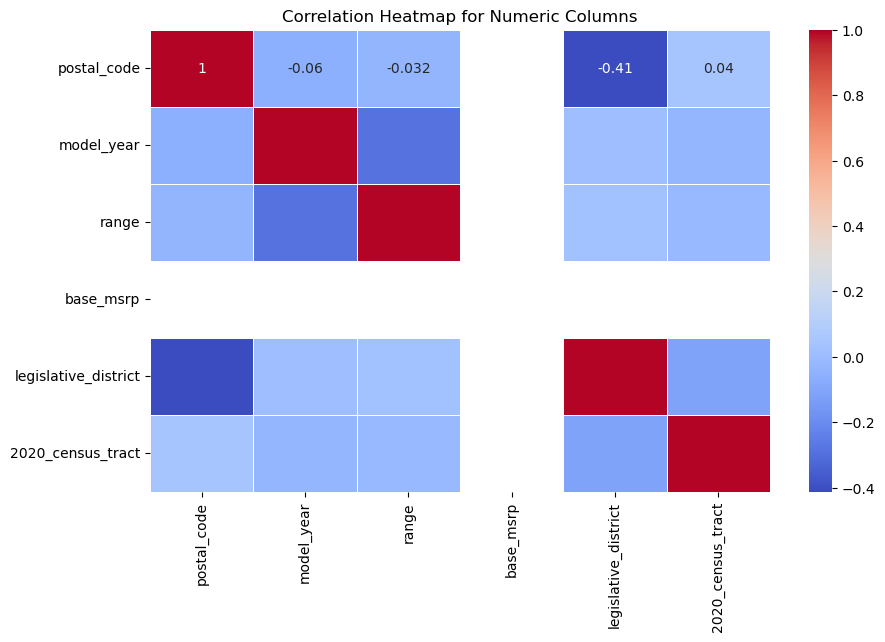

In [48]:
numeric_cols = ['postal_code', 'model_year', 'range', 'base_msrp', 'legislative_district', '2020_census_tract']

corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Numeric Columns')
plt.show()


# Pair Plot (Numeric Data)

C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

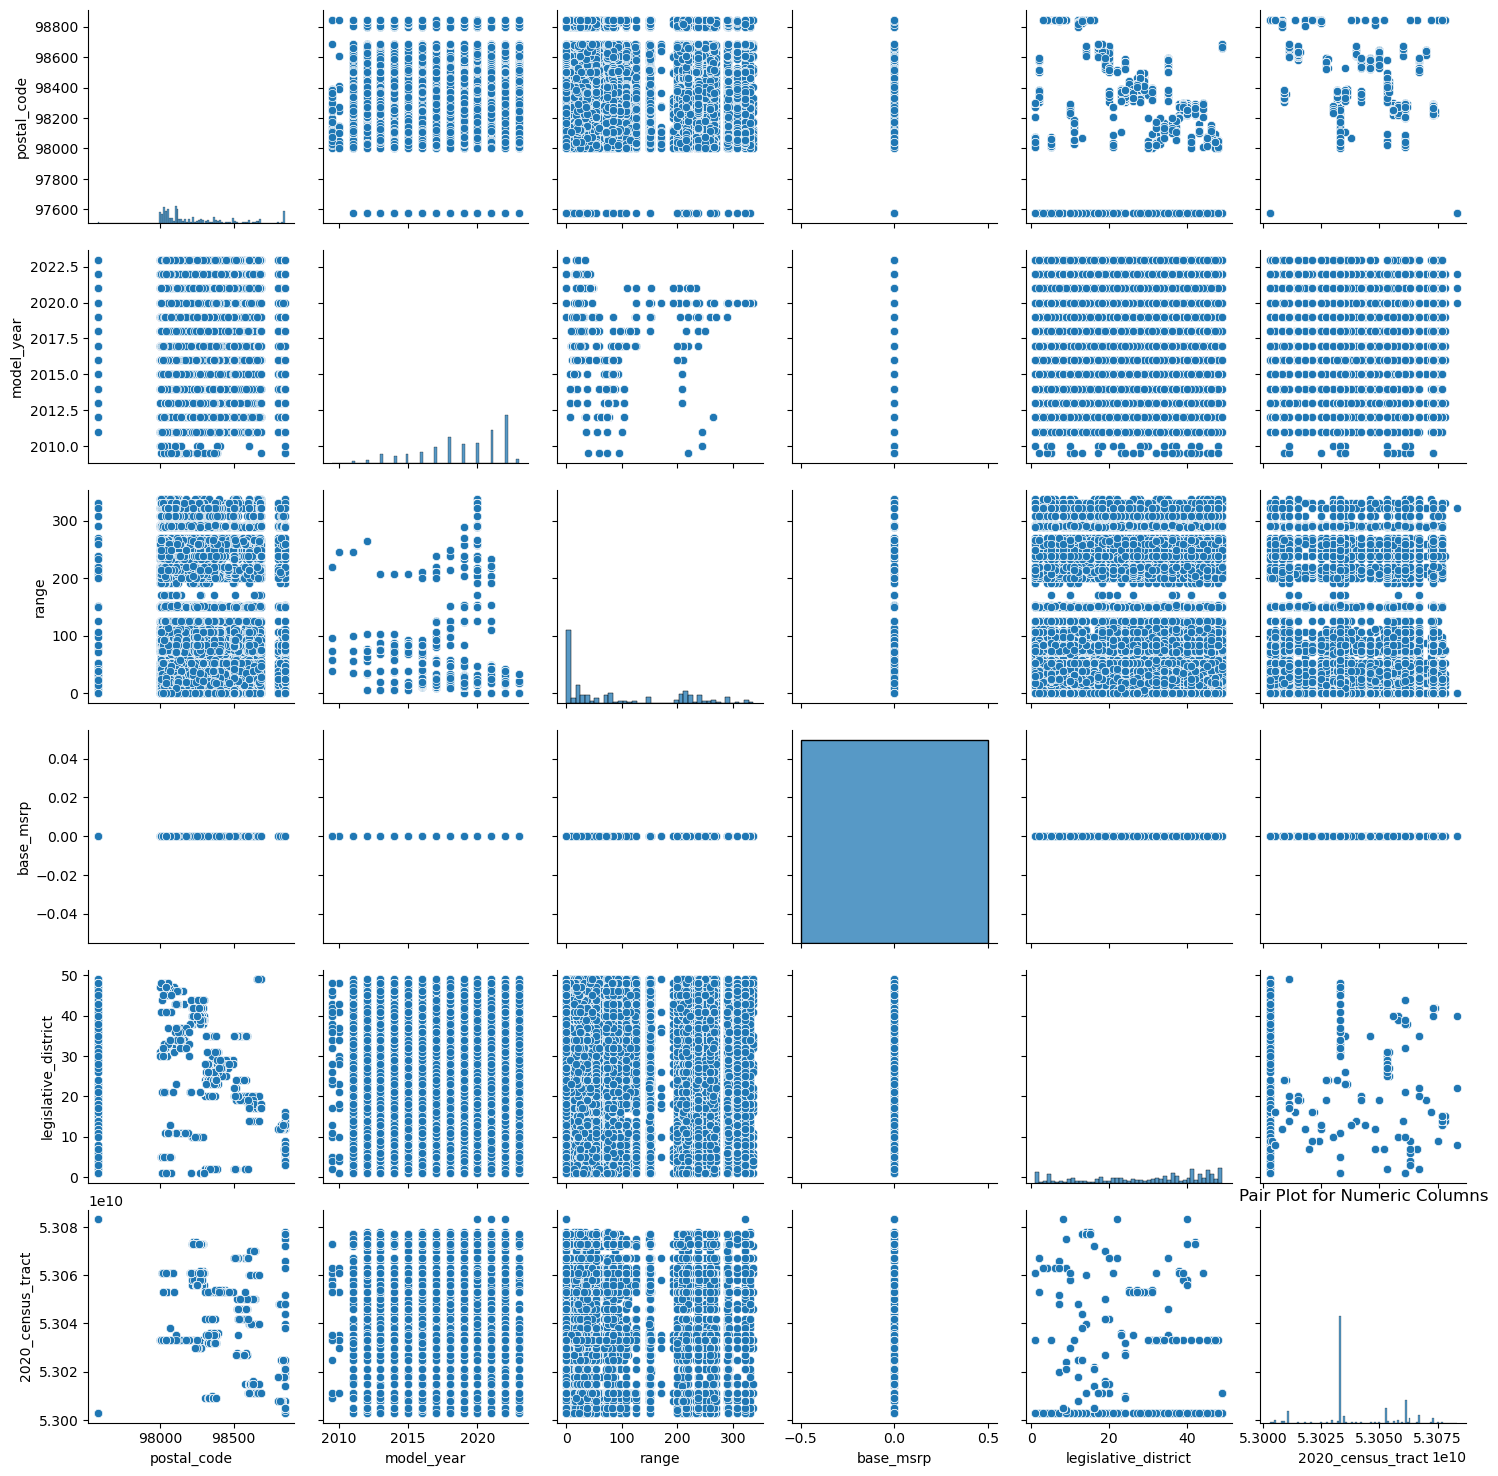

In [49]:
sns.pairplot(df[numeric_cols])
plt.title('Pair Plot for Numeric Columns')
plt.show()


# Boxplot (Range vs Make)

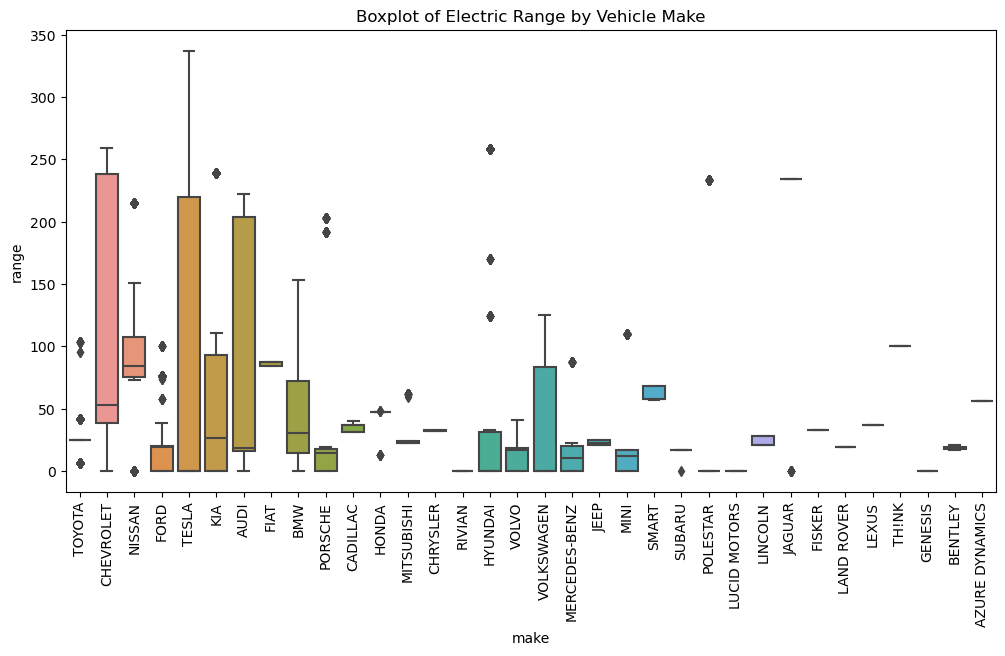

In [50]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='make', y='range', data=df)
plt.xticks(rotation=90)
plt.title('Boxplot of Electric Range by Vehicle Make')
plt.show()


# Bar Plot (Type of Electric Vehicle)

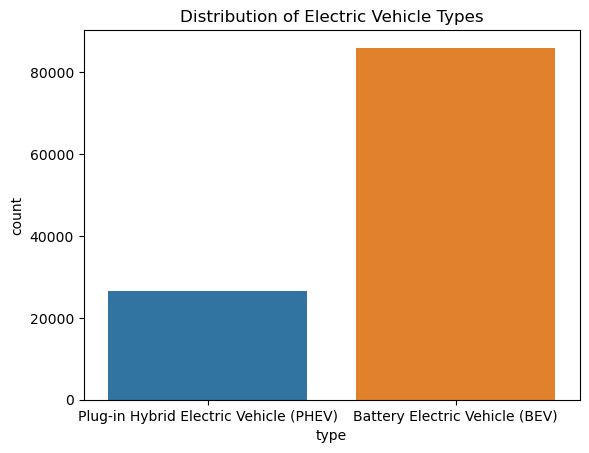

In [51]:
sns.countplot(x='type', data=df)
plt.title('Distribution of Electric Vehicle Types')
plt.show()


# Violin Plot (Range by Type)

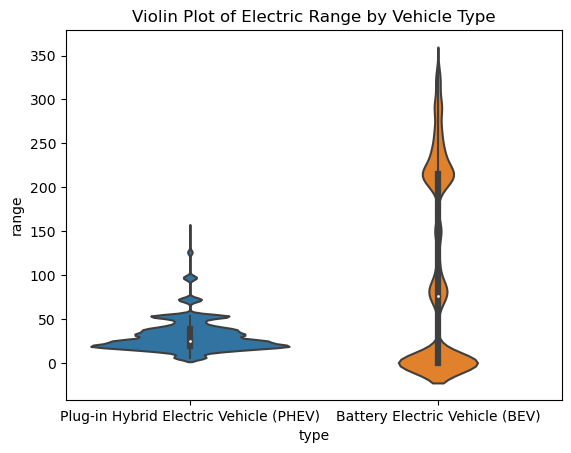

In [52]:
sns.violinplot(x='type', y='range', data=df)
plt.title('Violin Plot of Electric Range by Vehicle Type')
plt.show()


# Scatter Plot (Range vs MSRP)

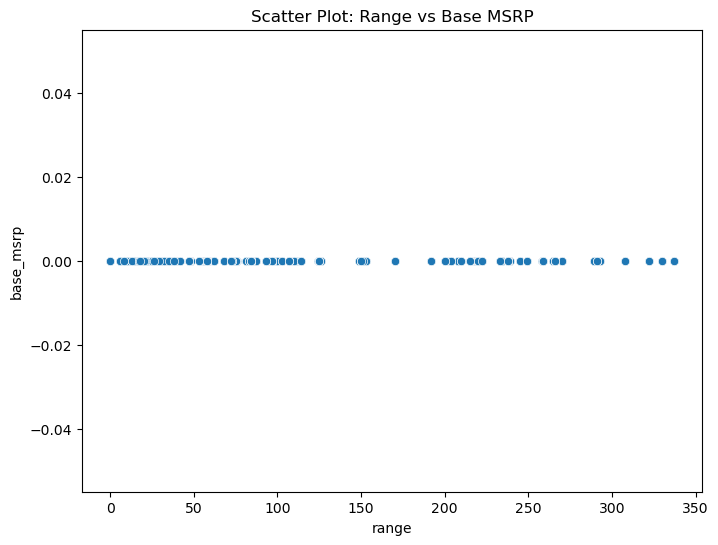

In [53]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='range', y='base_msrp', data=df)
plt.title('Scatter Plot: Range vs Base MSRP')
plt.show()


#  Boxplot (MSRP by Model Year)

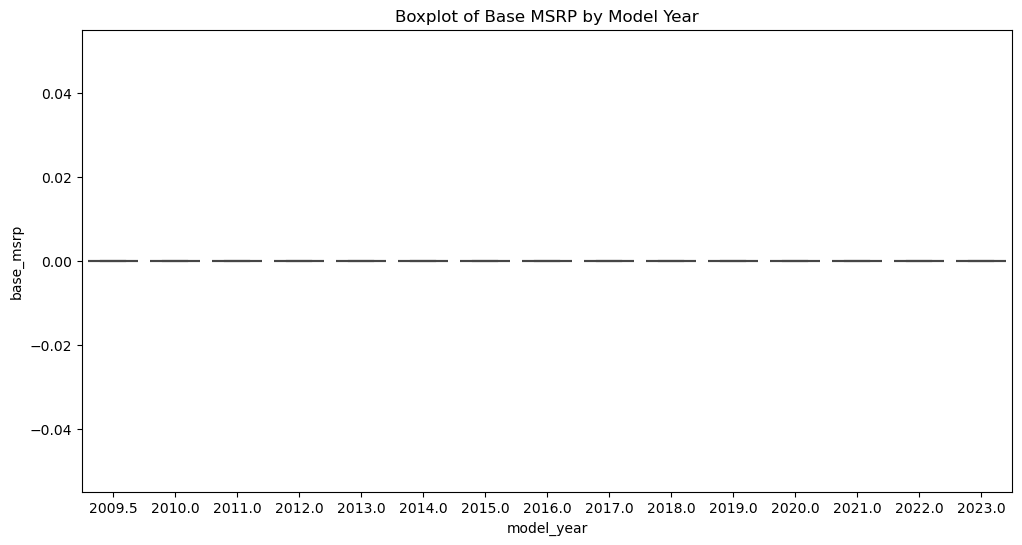

In [54]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='model_year', y='base_msrp', data=df)
plt.title('Boxplot of Base MSRP by Model Year')
plt.show()


# Stacked Bar Plot (Type vs Model Year)

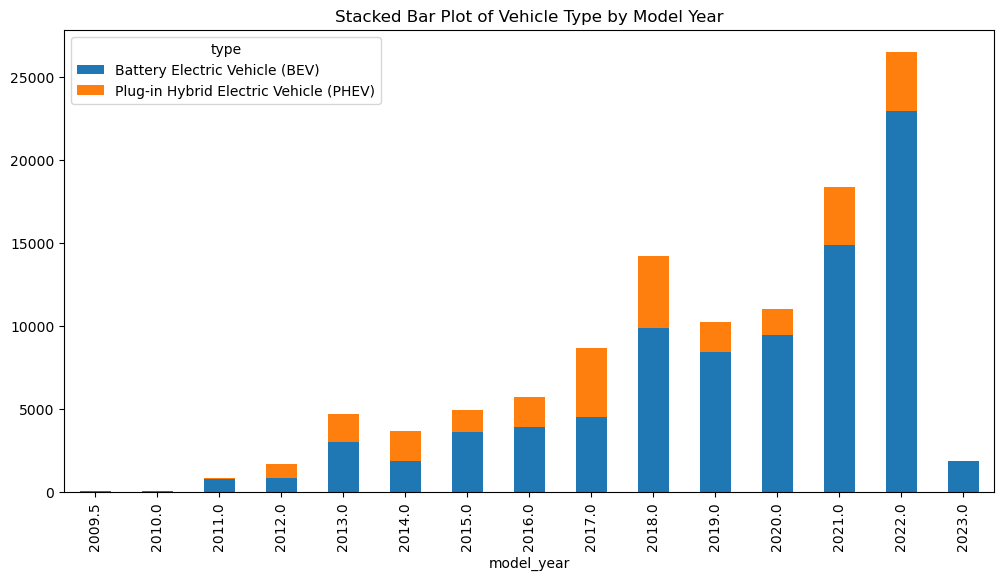

In [55]:
pd.crosstab(df['model_year'], df['type']).plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Stacked Bar Plot of Vehicle Type by Model Year')
plt.show()


# Heatmap (Vehicle Registration by City and County)

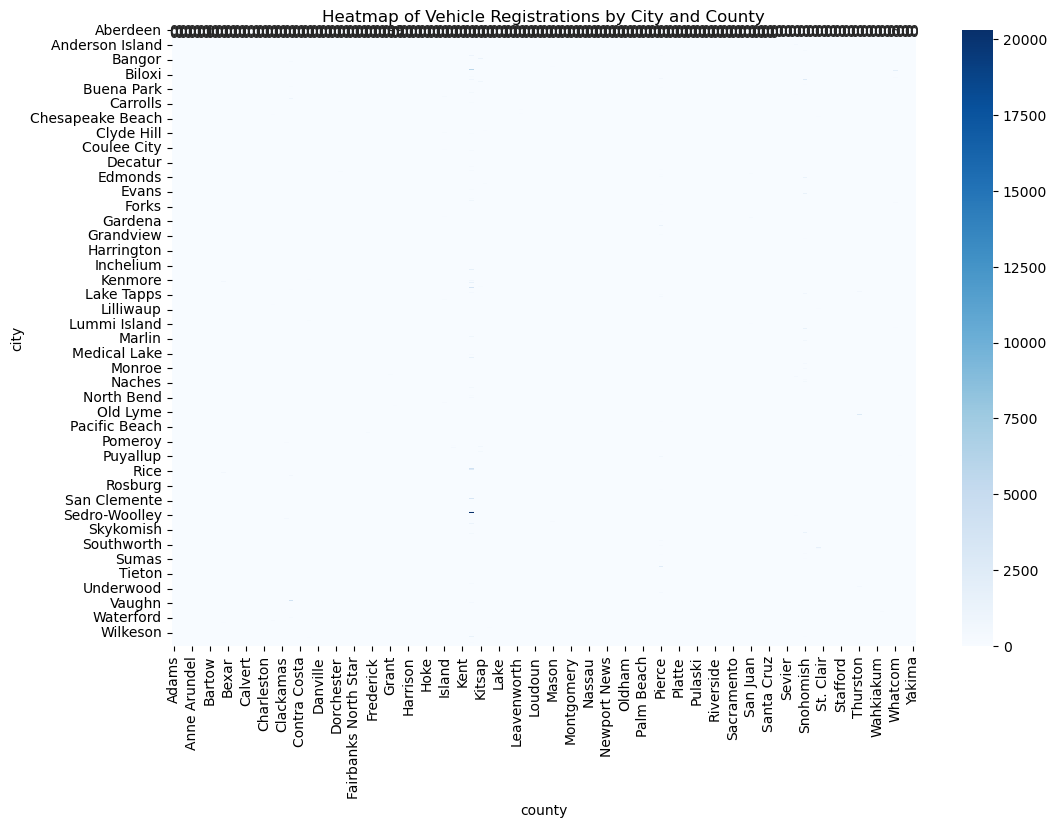

In [56]:
city_county_pivot = pd.crosstab(df['city'], df['county'])
plt.figure(figsize=(12, 8))
sns.heatmap(city_county_pivot, cmap='Blues',annot=True)
plt.title('Heatmap of Vehicle Registrations by City and County')
plt.show()


C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


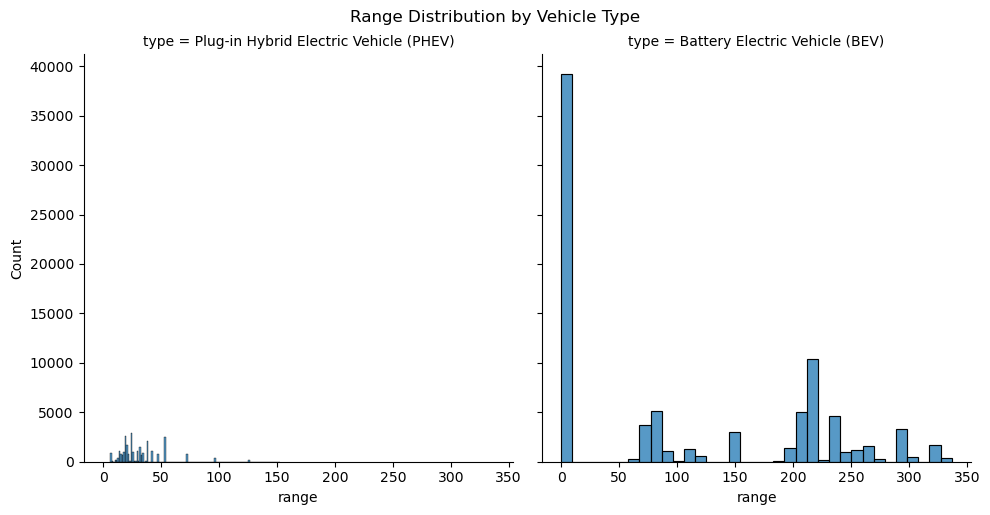

C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


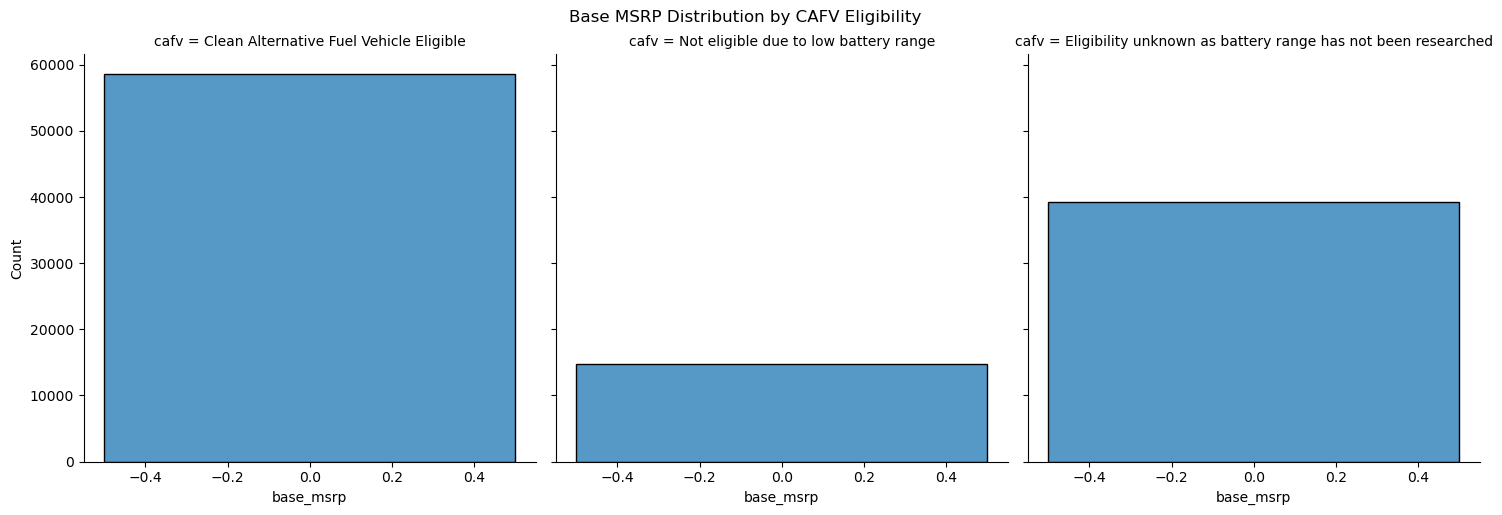

In [57]:
g = sns.FacetGrid(df, col='type', height=5)
g.map(sns.histplot, 'range')
plt.suptitle('Range Distribution by Vehicle Type', y=1.02)
plt.show()

g = sns.FacetGrid(df, col='cafv', height=5)
g.map(sns.histplot, 'base_msrp')
plt.suptitle('Base MSRP Distribution by CAFV Eligibility', y=1.02)
plt.show()


C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


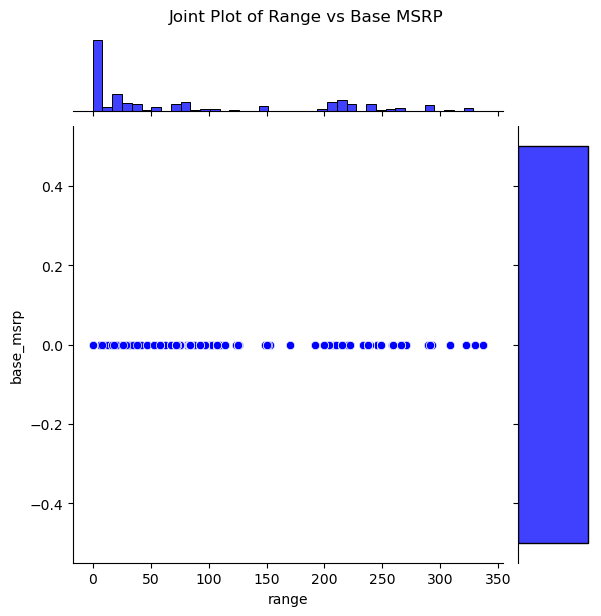

In [58]:
sns.jointplot(x='range', y='base_msrp', data=df, kind='scatter', color='b')
plt.suptitle('Joint Plot of Range vs Base MSRP', y=1.02)
plt.show()


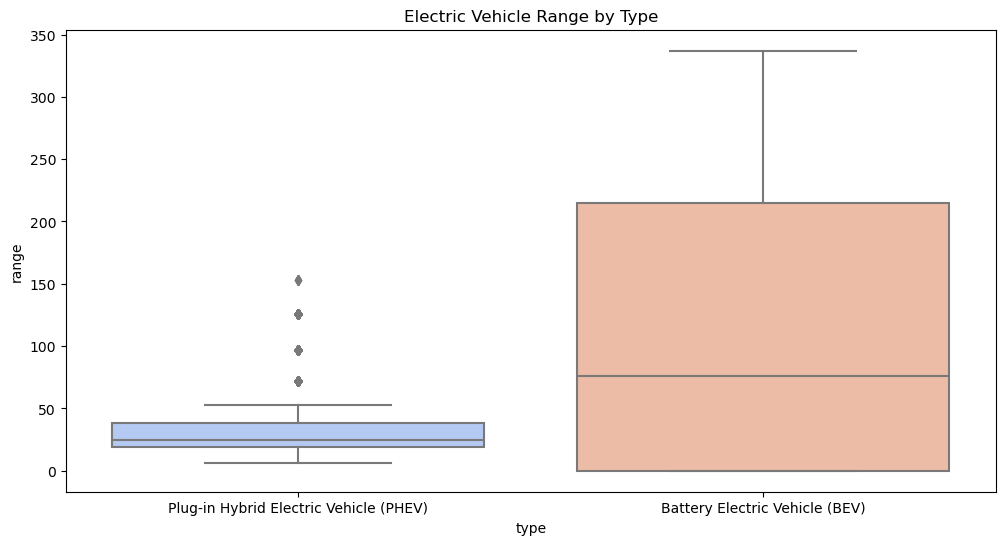

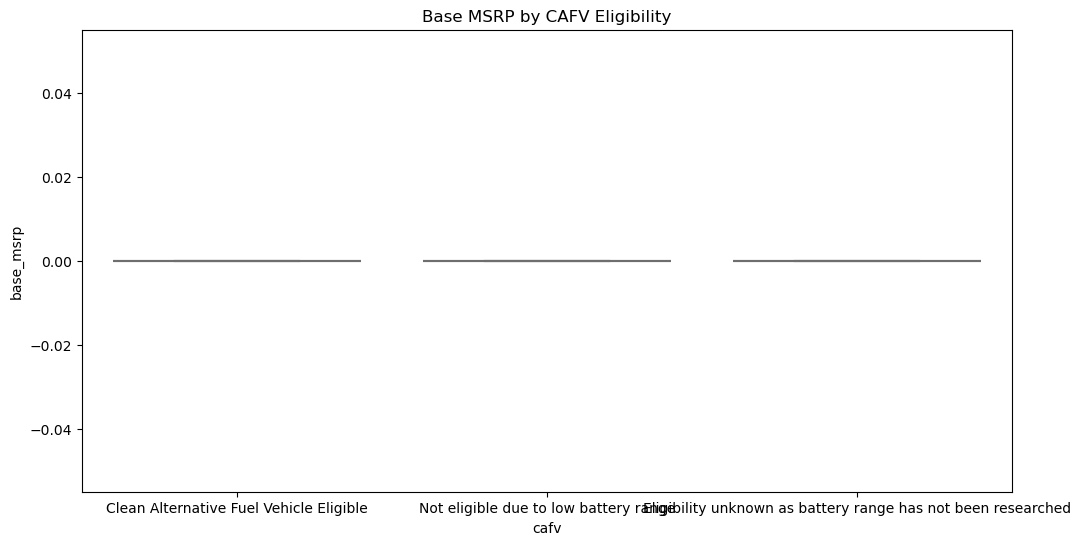

In [59]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='type', y='range', data=df, palette='coolwarm')
plt.title('Electric Vehicle Range by Type')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='cafv', y='base_msrp', data=df, palette='coolwarm')
plt.title('Base MSRP by CAFV Eligibility')
plt.show()


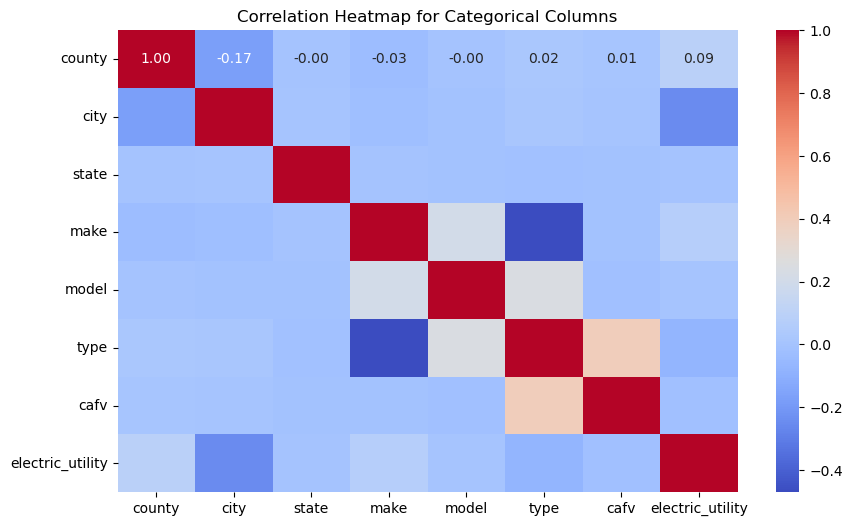

In [60]:
from sklearn.preprocessing import LabelEncoder
cat_cols = ['county', 'city', 'state', 'make', 'model', 'type', 'cafv', 'electric_utility']
df_encoded = df[cat_cols].apply(LabelEncoder().fit_transform)

corr_cat = df_encoded.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_cat, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Categorical Columns')
plt.show()


# question 2

In [61]:
dff.head(1)

,vin,county,city,state,postal_code,model_year,make,model,type,cafv,range,base_msrp,legislative_district,dol_vehicl_id,vehicle_location,electric_utility,2020_census_tract
0,JTMEB3FV6N,Monroe,Key West,FL,97575,2022.0,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,15.0,198968248.0,POINT (-81.80023 24.5545),PACIFICORP,53002912491


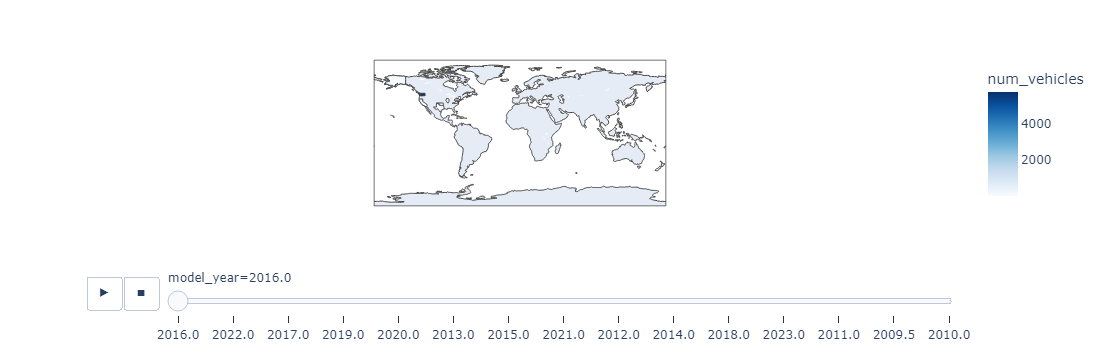

In [63]:

state_vehicle_count = dff.groupby(['state', 'model_year']).size().reset_index(name='num_vehicles')

fig = px.choropleth(
    state_vehicle_count,
    locations="state",             
    locationmode="USA-states",   
    color="num_vehicles",          
    hover_name="state",            
    animation_frame="model_year",  
    color_continuous_scale="Blues" )



fig.show()


# question 3

In [64]:
import bar_chart_race as bcr


In [74]:
import bar_chart_race as bcr
import warnings
df['model_year'] = df['model_year'].astype(str)

grouped_data = df.groupby(['model_year', 'make']).size().reset_index(name='Count')

pivoted_data = grouped_data.pivot(index='model_year', columns='make', values='Count')

pivoted_data = pivoted_data.fillna(0)

bcr.bar_chart_race(df=pivoted_data, filename='EV_racing_bar_plot.gif',
                   orientation='h', sort='desc', n_bars=10,
                   title='EV Make Count Over the Years', filter_column_colors=True, period_length=1000)

MovieWriter imagemagick unavailable; using Pillow instead.


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   vin                   112634 non-null  object 
 1   county                112634 non-null  object 
 2   city                  112634 non-null  object 
 3   state                 112634 non-null  object 
 4   postal_code           112634 non-null  int64  
 5   model_year            112634 non-null  object 
 6   make                  112634 non-null  object 
 7   model                 112634 non-null  object 
 8   type                  112634 non-null  object 
 9   cafv                  112634 non-null  object 
 10  range                 112634 non-null  int64  
 11  base_msrp             112634 non-null  int64  
 12  legislative_district  112634 non-null  float64
 13  dol_vehicl_id         112634 non-null  float64
 14  vehicle_location      112634 non-null  object 
 15  